In [13]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
from numpy import *

In [26]:
grover=QuantumCircuit(2,2)

In [27]:
##initialize
grover.h([0,1])
grover.barrier(0,1)

In [28]:
## make oracle select 11 state
grover.cz(0,1)
grover.barrier(0,1)

In [30]:
## invert about original statevector
grover.h([0,1])
grover.z([0,1])
grover.cz(0,1)
grover.h([0,1])
grover.barrier(0,1)
grover.measure([0,1],[0,1])

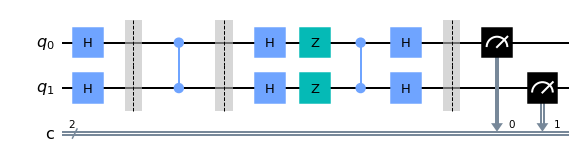

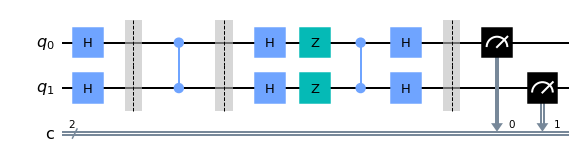

In [31]:
## show circuit
grover.draw('mpl')

In [32]:
## define simulator for counts
backend=Aer.get_backend('qasm_simulator')

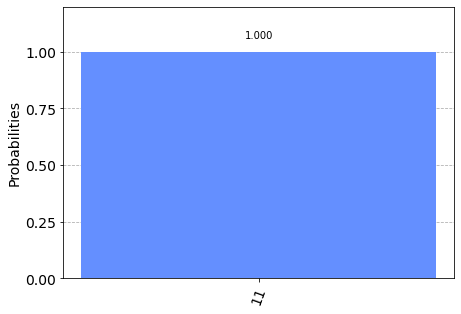

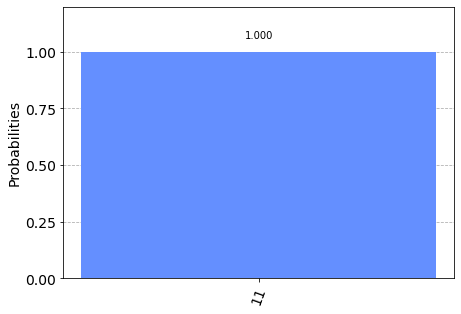

In [33]:
## run sim 20148 times + plot results
gtranspiled = transpile(grover, backend)
gobj = assemble(gtranspiled, shots = 2048)
simresults = backend.run(gobj).result()
plot_histogram(simresults.get_counts())

In [21]:
## call upon least busy ibm-q device to do computation
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on: ", device)

ibmqfactory.load_account:WARNING:2021-08-19 12:16:33,184: Credentials are already in use. The existing account in the session will be replaced.


Running on:  ibmq_lima


In [35]:
from qiskit.tools.monitor import job_monitor
qtreal = transpile(grover, device, optimization_level=3)
job = device.run(qtreal)
job_monitor(job, interval=2)

Job Status: job has successfully run


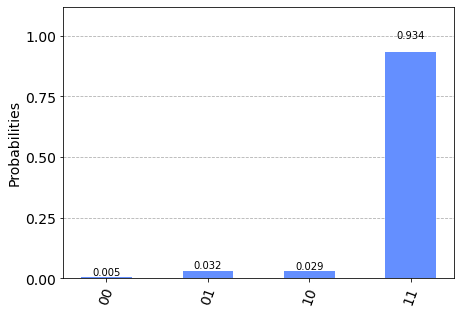

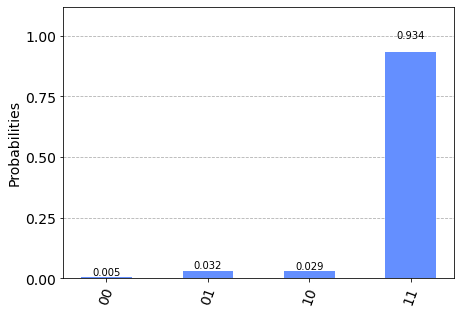

In [36]:
realresults = job.result()
realrcounts = realresults.get_counts(grover)
plot_histogram(realrcounts)